In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import warnings

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
pwd

'/Users/alexander.fioto/personal_github/project-5/alex'

In [7]:
df = pd.read_csv('../../covid-19-data/us-states.csv')

In [10]:
def plot_hmm(state, metric='cases', dates_of_interest=None, hmm_plot=False, n_components=3):
    '''
    You can switch metric to 'deaths' if you want.
    
    '''
    df = pd.read_csv('../../covid-19-data/us-states.csv')
    state_df = df[df['state'] == state]
    state_df.drop(columns='state', inplace=True)
    state_df['date']= pd.to_datetime(state_df['date'])
    state_df.set_index('date', inplace=True)
    state_diff = state_df.diff()
    state_diff.dropna(inplace=True)
    X = state_diff[[metric]]


    plt.figure(figsize=(14, 4))

    
    if hmm_plot:
        
        model = hmm.GaussianHMM(n_components=n_components)
        model.fit(X)
        preds = model.predict(X) / 2
        plt.plot(X.index, preds, marker='', label='Regimes', color='#F59808')

    
    
    plt.plot(X/(X.max() - X.min()), label=f'Change in {metric.title()}', color='#810D0D')
    plt.xlabel('Date')
    plt.ylabel('Rate of Change')
    if dates_of_interest:
        for date in dates_of_interest:
            plt.axvline(x=date, label=date, color='black')
    plt.legend()
    plt.title(f'{state.title()} Daily COVID-19 Case Change')

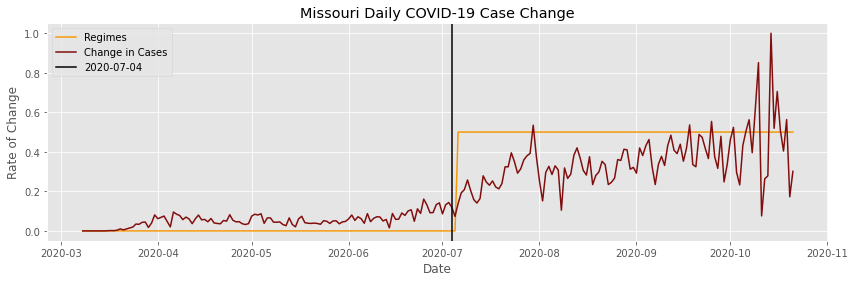

In [12]:
plot_hmm('Missouri', metric='cases', dates_of_interest=['2020-07-04'], hmm_plot=True, n_components=2)